In [5]:
import numpy as np
import matplotlib.pyplot as plt
n = []
n1 = []
s = []
s1 = []
c = []
c1 = []
d = []
with open("/home/home/weiyupeng/home/DM-Count/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0630-192910.log") as f:
    line = f.readline()
    while line:
        
        line = f.readline()
        
        if "optmize time:" in line:
            # begin
            d.append(float(line.split(":")[-1].strip() ))
            line = f.readline()
            n.append(float(line.split(":")[-1].strip() ))
            line = f.readline()
            s.append(float(line.split("INFO -")[-1].strip()))
            line = f.readline()
            c.append(float(line.split("INFO -")[-1].strip()))
            line = f.readline()
            n1.append(float(line.split(":")[-1].strip() ))
            line = f.readline()
            s1.append(float(line.split("INFO -")[-1].strip()))
            line = f.readline()
            c1.append(float(line.split("INFO -")[-1].strip()))

f = np.array 
n = f(n); n1 = f(n1);                 
s = f(s); s1 = f(s1);   d1 = f(d)              

In [3]:
import numpy as np
import matplotlib.pyplot as plt
n = []
n1 = []
s = []
s1 = []
d = []
with open("/home/weiyupeng/home/DM-Count/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0617-203238.log") as f:
    line = f.readline()
    while line:
        
        line = f.readline()
        if "emd time with init" in line:
            # begin
            n.append(float(line.split(":")[-1].strip() ))
            line = f.readline()
            s.append(float(line.split("INFO -")[-1].strip()))
            line = f.readline()
            d.append(float(line.split(":")[-1].strip() ))
            line = f.readline()
            n1.append(float(line.split(":")[-1].strip() ))
            line = f.readline()
            s1.append(float(line.split("INFO -")[-1].strip()))
   
f = np.array 
n = f(n); n1 = f(n1);                 
s = f(s); s1 = f(s1);   d1 = f(d)       


FileNotFoundError: [Errno 2] No such file or directory: '/home/weiyupeng/home/DM-Count/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0617-203238.log'

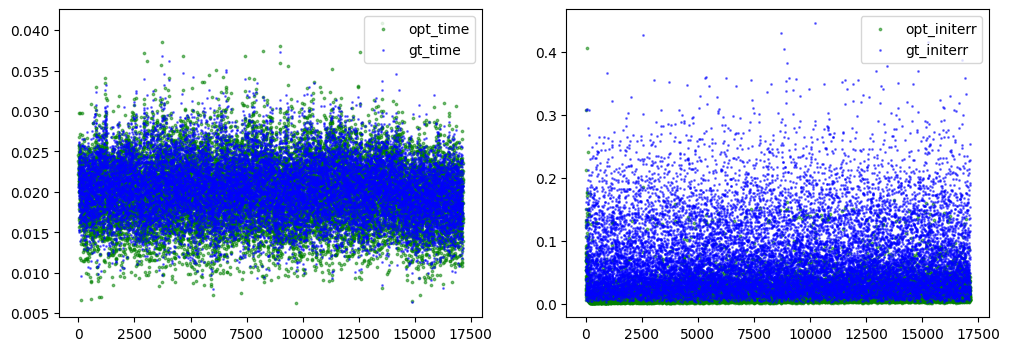

In [36]:
def avg(original_array):
    new_array = []
    for i in range(0,len(original_array),8):
            if i+8 > len(original_array):
                  break;
            avg = sum(original_array[i:i+8])/8
            new_array.append(avg)
    return np.array(new_array)

f, ax=  plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 4))
ax[0].scatter(range(len(avg(n))),avg(n),s=3,c="g",alpha = 0.5)
ax[0].scatter(range(len(avg(n1))),avg(n1),s=1,c="b",alpha = 0.5)
ax[1].scatter(range(len(avg(s))),avg(s),s=3,c="g",alpha = 0.5)
ax[1].scatter(range(len(avg(s1))),avg(s1),s=1,c="b",alpha = 0.5)
# ax[1].scatter(range(len(avg(n+s))),avg(n),s=3,c="g",alpha = 0.5)
# ax[1].scatter(range(len(avg(n1))),avg(n1),s=1,c="b",alpha = 0.5)
ax[0].legend(["opt_time","gt_time"]) 
ax[1].legend(["opt_initerr","gt_initerr"]) 

plt.savefig('my_scatter.jpg',dpi=500) 


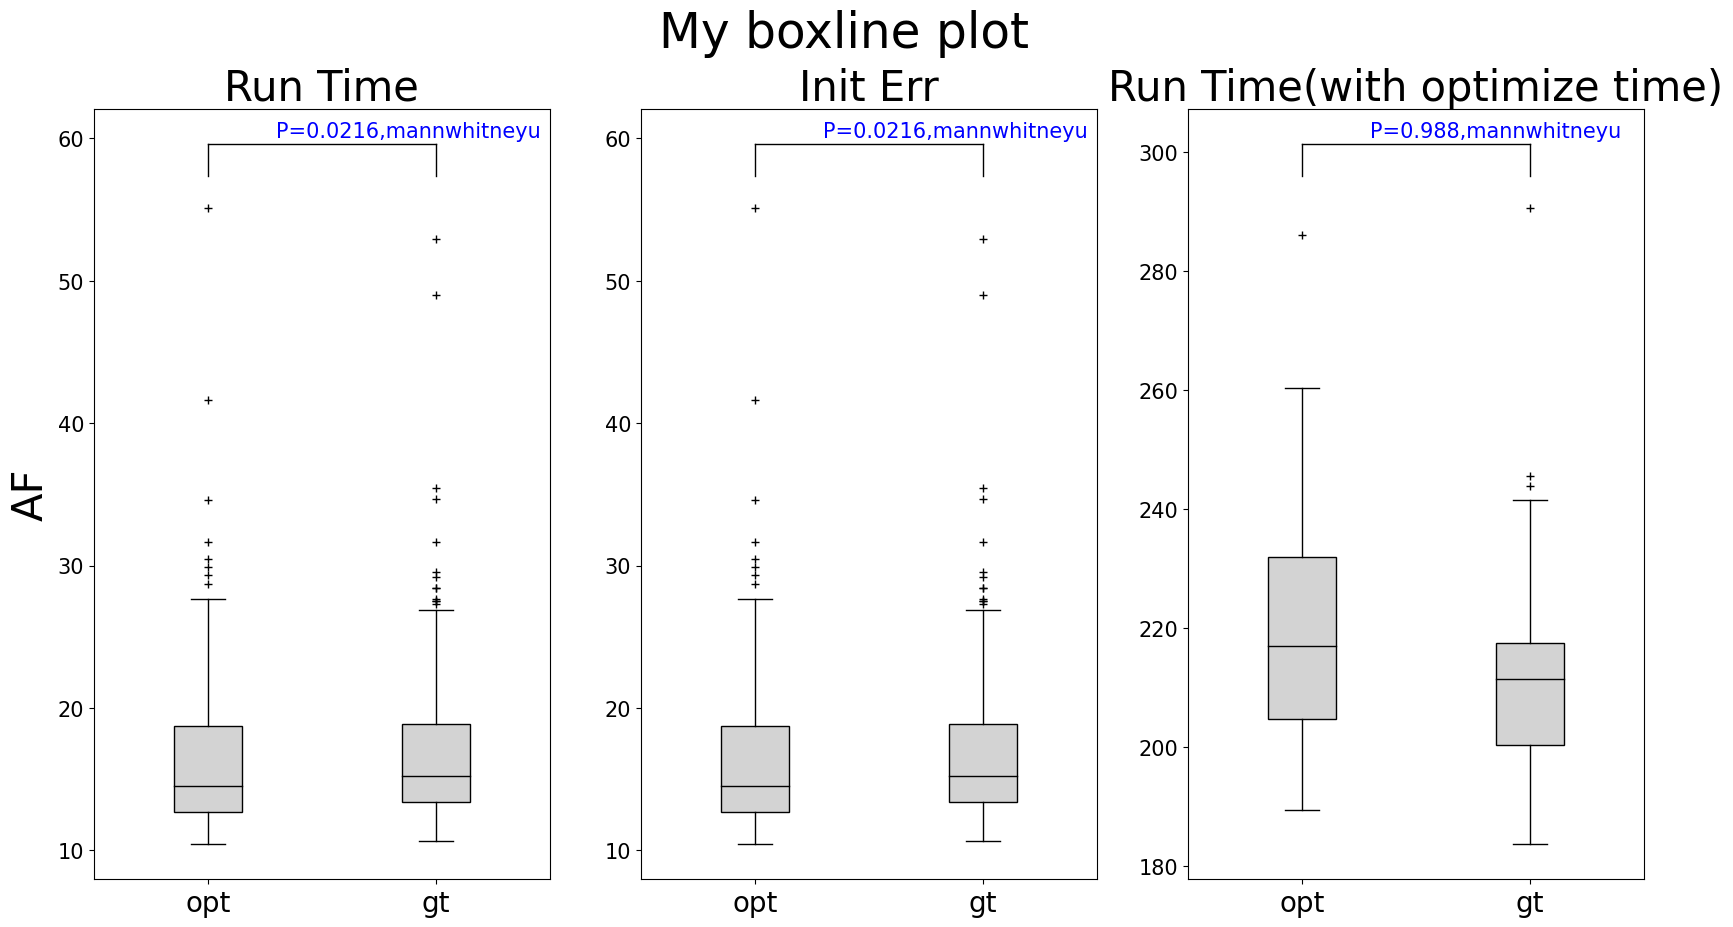

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#导入matplotlib
from scipy import stats#用来计算非参数检验P_value

df1 = pd.DataFrame({"opt":train_mse[:len(train_mse1)],"gt":train_mse1[:len(train_mse)]})
df2 = pd.DataFrame({"opt":train_mae[:len(train_mae1)],"gt":train_mae1[:len(train_mae)]})
df3 = pd.DataFrame({"opt":test_mse[:len(test_mse1)],"gt":test_mse1[:len(test_mse)]})

fig=plt.figure(figsize=(20,10))#初始化图片
i=1 #该变量用来迭代3图片，每次for循环会+1
d={1:'Run Time',2:'Init Err',3:'Run Time(with optimize time)'} #3张子图的名字

for df in [df1,df2,df3]:
    ax=fig.add_subplot(1,3,i)#一共一排，一排三张图，目前是第i张。
    pvalue=stats.mannwhitneyu(df['opt'],df['gt'],alternative='less')[1] #对新旧数据进行非参数检验-秩和检验，得空写写mannwhitneyu和Wilcoxon的区别。

#首先df['old']或者df['new']取到某列array，然后dropna（）去除该array中的空值。labels是横轴上每个小箱的标签。widths是箱宽。patch_artist为是否填充箱体的颜色，如不要默认设置，想自己设置，则该项选True。boxprops定义box的参数。flierprops定义离群值的参数。medianprops定义中位线的参数。
    plt.boxplot([df['opt'].dropna(),df['gt'].dropna()],labels=['opt','gt'],widths=0.3,patch_artist=True,boxprops={'color':'black','facecolor':'lightgrey'},flierprops={'marker':'+','markerfacecolor':'black','color':'lightgrey'},medianprops={"linestyle":'-','color':'black'})
    plt.title(d[i],fontsize=30)#通过d字典索引title
    plt.xticks(fontsize=20)#定义X轴标签字体大小
    plt.yticks(fontsize=15)
    if i==1:ax.set_ylabel('AF',fontsize=30)#为所有的子图定义同一个Y轴标签，我猜测会有更聪明的办法，目前就这。
    i+=1 #本次循环不会再用到i的，所以增加1。
    
#以下为添加非参数检验的结果
    y_max=df.max().max()#计算df中最大值，第一次max得出两列各自的最大值，也就是2个值。第二次max从刚2个值中再择出最大值。则可以得到全df的最大值。本步骤的目的是确保添加的文本在最大值的上方，不要和图片重叠了。
    y_min=df.min().min()#计算df中的最小值，本步骤的目的在下面可以看到。
    
#df最大值-df最小值，得到图片的纵向范围，然后尝试一个合适的比例，去放置文本。这里选择的比例是10，即添加的文本的位置是在y_max上方，再加整图纵向范围的十分之一长度的位置。这是多次尝试的结果。当然也可以使用绝对距离，直接y_max加某数即可。不能直接使用y_max,不然会和箱线图重叠。
#这里plt.plot()里面的值，含义是position，即画出一条[x1=1,x2=2][y1=[y_max+(y_max-y_min)/10,y2=y_max+(y_max-y_min)/10]的线。发现了吗，y1=y2,所以它其实就是一条平行于x轴的横线。
    plt.plot([1,2], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
#再画两条纵线
    plt.plot([1,1], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
    plt.plot([2,2], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
#在横向上方中间的位置加上p值。中间的位置需要自己找，毕竟fontsize、p值小数点后位数，都会影响其位置。
    plt.text(1.30,y_max+(y_max-y_min)/9,f'P={round(pvalue,4)},mannwhitneyu',fontsize=15,color='blue')
#为全图加上title
fig.suptitle('My boxline plot',fontsize=35)

#保存图片，dpi可以增加清晰度。
plt.savefig('my_boxline.jpg',dpi=500) 




In [52]:
# 再使用上面的那个函数来判断一下train_mse和train_mse1（gt）的差异

MannwhitneyuResult(statistic=316410300.5, pvalue=0.0)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import re
train_mse = []
train_mae = []
obj = []
test_mse = []
test_mae = []
with open("/home/home/weiyupeng/home/DM-Count/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0707-085959.log") as f:
    line = f.readline()
    while line:
        
        line = f.readline()
        
        if "Train, Loss:" in line:
            mse_mae = re.findall(r' MSE: (.+) MAE: (.+),',line)#
            train_mse.append(float(mse_mae[0][0]))
            train_mae.append(float(mse_mae[0][1]))

            obj.append(float(re.findall(r'OT obj value: (\d+\.\d+),',line)[0]))
        if "Val, MSE" in line:
            mse_mae = re.findall(r' MSE: (.+) MAE: (.+),',line)
            test_mse.append(float(mse_mae[0][0]))
            test_mae.append(float(mse_mae[0][1]))
train_mse1 = []
train_mae1 = []
obj1 = []
test_mse1 = []
test_mae1 = []
with open("/home/home/weiyupeng/home/DM-Count-master/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0702-153950.log") as f:
    line = f.readline()
    while line:
        
        line = f.readline()
        
        if "Train, Loss:" in line:
            mse_mae = re.findall(r' MSE: (.+) MAE: (.+),',line)#
            train_mse1.append(float(mse_mae[0][0]))
            train_mae1.append(float(mse_mae[0][1]))
            obj1.append(float(re.findall(r'OT obj value: (\d+\.\d+),',line)[0]))

        if "Val, MSE" in line:
            mse_mae = re.findall(r' MSE: (.+) MAE: (.+),',line)
            test_mse1.append(float(mse_mae[0][0]))
            test_mae1.append(float(mse_mae[0][1]))

f = np.array 
train_mse = f(train_mae); train_mse = f(train_mae);                 
test_mse = f(test_mse); test_mae = f(test_mae);    
train_mse1 = f(train_mae1); train_mse1 = f(train_mae1);                 
test_mse1 = f(test_mse1); test_mae1 = f(test_mae1);  
obj = f(obj); obj1 = f(obj1)
print(len(train_mse),len(train_mse1),len(obj),len(obj1))

8 178 8 178


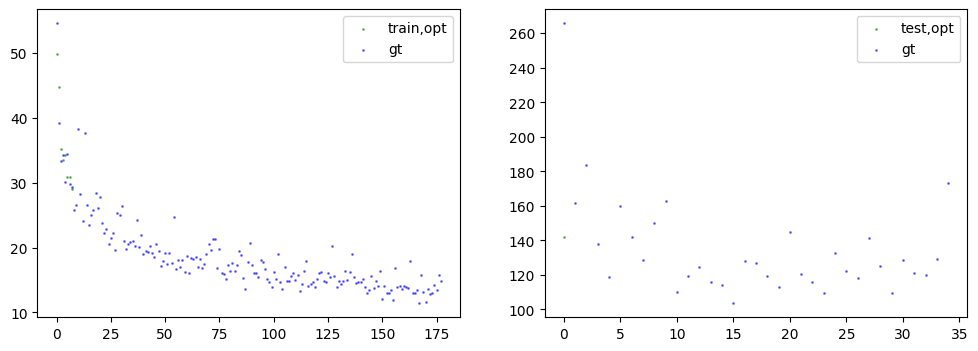

In [5]:
f, ax=  plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 4))
ax[0].scatter(range(len(train_mae)),train_mae,s=1,c="g",alpha = 0.5)
ax[0].scatter(range(len(train_mae1)),train_mae1,s=1,c="b",alpha = 0.5)
ax[1].scatter(range(len(test_mae)),test_mae,s=1,c="g",alpha = 0.5)
ax[1].scatter(range(len(test_mae1)),test_mae1,s=1,c="b",alpha = 0.5)
ax[0].legend(["train,opt","gt"]) 
ax[1].legend(["test,opt","gt"]) 

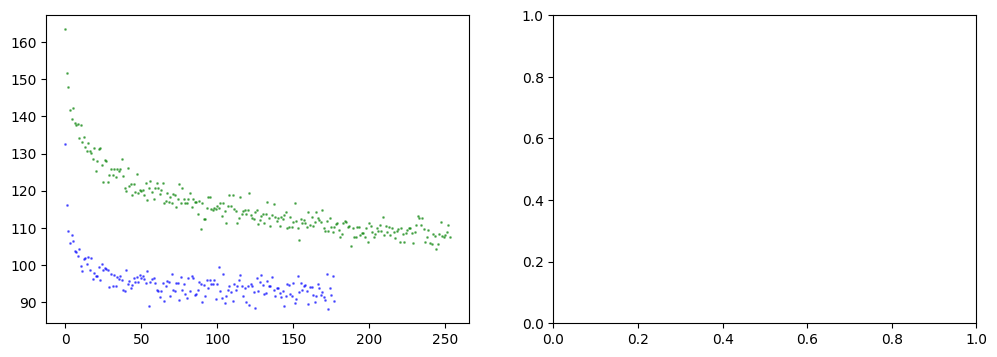

In [38]:
f, ax=  plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 4))
ax[0].scatter(range(len(obj)),obj,s=1,c="g",alpha = 0.5)
ax[0].scatter(range(len(obj1)),obj1,s=1,c="b",alpha = 0.5)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import re
init = []
beforestart = []
endtime = []
with open("/home/home/weiyupeng/home/DM-Count/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0703-110248.log") as f:
    line = f.readline()
    while "-----Epoch 0/1000-----" not in line:
        line = f.readline()
    while "start" not in line:
        line = f.readline()
        if "Epoch " in line or "errors" in line or "start" in line or "mae" in line or line == '':
            continue
        beforestart.append(float(line.split(" - ")[-1].strip()))
        line = f.readline()
        endtime.append(float(line.split(" - ")[-1].strip()))
    while "errors" not in line and line:
        line = f.readline()
        if "Epoch " in line or "errors" in line or  "mae" in line or line == '' or "nan" in line:
            continue
        init.append(float(line.split(" - ")[-1].strip()))
        line = f.readline()
        endtime.append(float(line.split(" - ")[-1].strip()))
f = np.array 
init = f(beforestart+init); noinit = f(endtime);   beforestart = f(beforestart)  
print(len(init),len(noinit),len(beforestart))

917177 917177 299


0.024715112701184504


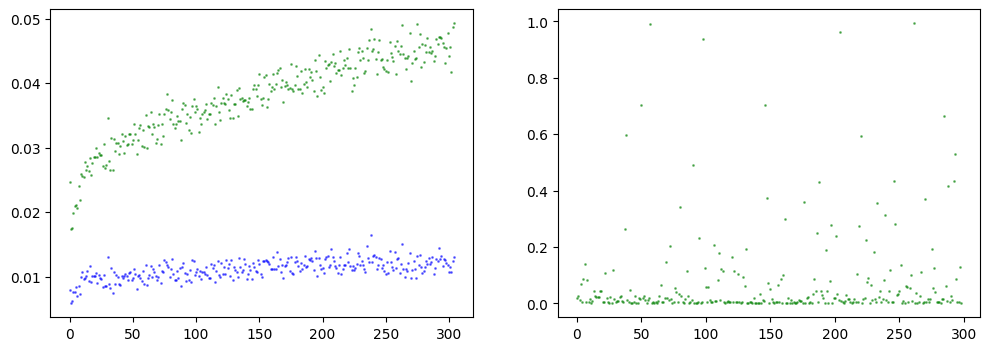

In [9]:
intval = 3000
def avg(original_array):
    new_array = []
    for i in range(0,len(original_array),intval):
            if i+intval > len(original_array):
                  break;
            avg = sum(original_array[i:i+intval])/intval
            new_array.append(avg)
    return np.array(new_array)
f, ax=  plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 4))
print(avg(init)[0])
ax[0].scatter(range(len(avg(init))),avg(init),s=1,c="g",alpha = 0.5)
ax[0].scatter(range(len(avg(endtime))),avg(endtime),s=1,c="b",alpha = 0.5)
ax[1].scatter(range(len(beforestart)),beforestart,s=1,c="g",alpha = 0.5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
init = []
beforestart = []
beforestart2 = []
endtime = []
endtime2 = []
init2 = []
with open("/home/home/weiyupeng/home/DM-Count/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0704-003801.log") as f:
    line = f.readline()
    while "-----Epoch 0/1000-----" not in line:
        line = f.readline()
    # while "start" not in line:
    #     line = f.readline()
    #     if "Epoch " in line or "errors" in line or "start" in line or "mae" in line or line == '':
    #         continue
    #     beforestart.append(float(line.split(" - ")[-1].strip()))
    #     line = f.readline()
    #     endtime.append(float(line.split(" - ")[-1].strip()))
    while "errors" not in line and line:
        line = f.readline()
        if "Epoch " in line or "errors" in line or  "mae" in line or "stop" in line or line == '' or "nan" in line:
            continue
        init.append(float(line.split(" - ")[-1].strip()))
        line = f.readline()
        endtime.append(float(line.split(" - ")[-1].strip()))
f = np.array 
init = f(beforestart+init); noinit = f(endtime);   beforestart = f(beforestart)  
print(len(init),len(noinit),len(beforestart))
with open("/home/home/weiyupeng/home/DM-Count/ckpts/input-512_wot-0.1_wtv-0.01_reg-10.0_nIter-100_normCood-0/train-0707-085959.log") as f:
    line = f.readline()
    while "-----Epoch 0/1000-----" not in line:
        line = f.readline()
    while "start" not in line:
        line = f.readline()
        if "Epoch " in line or "errors" in line or "start" in line or "mae" in line or line == '':
            continue
        beforestart2.append(float(line.split(" - ")[-1].strip()))
        line = f.readline()
        endtime2.append(float(line.split(" - ")[-1].strip()))
    while "errors" not in line and line:
        line = f.readline()
        if "Epoch " in line or "errors" in line or  "mae" in line or line == '' or "nan" in line:
            continue
        init2.append(float(line.split(" - ")[-1].strip()))
        line = f.readline()
        endtime2.append(float(line.split(" - ")[-1].strip()))
f = np.array 
init2 = f(beforestart2+init2); noinit2 = f(endtime2);   beforestart2 = f(beforestart2)  
print(len(init2),len(noinit2),len(beforestart2))

953051 953051 0
8604 8604 299


0.048812475762873266


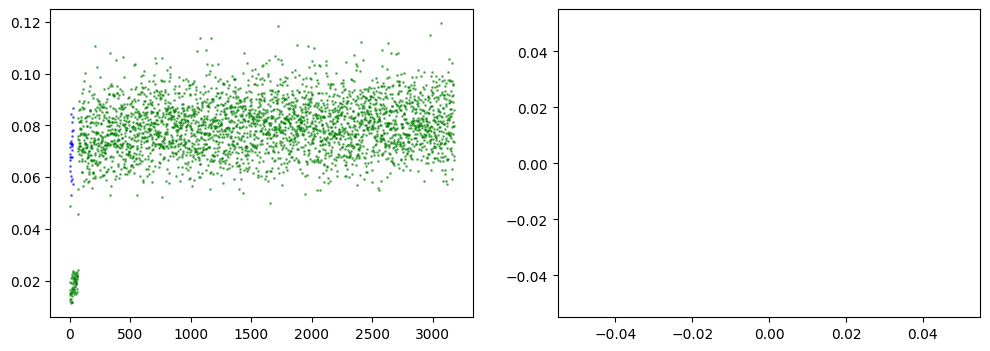

In [3]:
intval = 300
def avg(original_array):
    new_array = []
    for i in range(0,len(original_array),intval):
            if i+intval > len(original_array):
                  break;
            avg = sum(original_array[i:i+intval])/intval
            new_array.append(avg)
    return np.array(new_array)
f, ax=  plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 4))
print(avg(init)[0])
ax[0].scatter(range(len(avg(init))),avg(init),s=1,c="g",alpha = 0.5)
ax[0].scatter(range(len(avg(init2))),avg(init2),s=1,c="b",alpha = 0.5)
ax[1].scatter(range(len(beforestart)),beforestart,s=1,c="g",alpha = 0.5)